# Data Wraggling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py     #commom package to interact with a dataset that is stored to an H5 file
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
%matplotlib inline

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
C:\Users\Administrator\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [2]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it is a cat picture


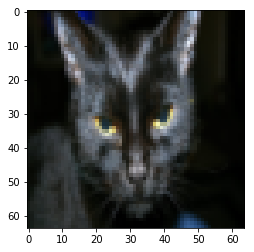

In [4]:
index = 25
example = train_set_x_orig[index]
plt.imshow(train_set_x_orig[index])

# training set includes 209 label, 0 & 1
print("y = " + str(train_set_y[:,index]) + ", it is a " + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") + " picture")

In [5]:
# please make sure that your matrix \ vector dimensions straightforwad you will eliminate the bugs


In [6]:
m_train = train_set_x_orig.shape[0]   # number of training example
m_test = test_set_x_orig.shape[0]     # number of test example     training No. / testing No. = 4/1 
num_px = train_set_x_orig.shape[1]    # picture dimension

In [7]:
print("Number of training examples: m_train = " + str(m_train))
print("Number of test examples: m_train = " + str(m_test))
print("Height/width of image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")   #RGB 3 channels
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of test examples: m_train = 50
Height/width of image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


For convenience, you should now reshape images of shape(num_px, num_py, 3) in a numpy-array of shape(num_px * num_py * 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train(respectively m_test) columns. 

In [8]:
# change the label into different figure and start   training matrix(12288, 209) ... 12288 units and 209 examples 
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
# train_set_x_orig  is the number of picture 
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
# test_set_x_flatten[0] is the number of the picture
# another way to solve the flatten   train_set_x_orig (209, num_px * num_px * 3)

print("train_set_x_flatten shape:" + str(train_set_x_flatten.shape))
print("train_set_y shape:" + str(train_set_y.shape))

print("test_set_x_flatten shape:"  + str(test_set_x_flatten.shape))
print("test_set_y shape:" + str(test_set_y.shape))

print("sanity check after reshaping:" + str(train_set_x_flatten[0:5,0]))  # check the validation

train_set_x_flatten shape:(12288, 209)
train_set_y shape:(1, 209)
test_set_x_flatten shape:(12288, 50)
test_set_y shape:(1, 50)
sanity check after reshaping:[17 31 56 22 33]


To represent color image, RGB, must be specified for each pixel, and so the pixel value is actually a vector of three numbers from 0 to 255.
one common preprocessing step in machine learning is to center and standardize you dataset, meaning that you substract the mean of the whole numpy array from each example... mean...divide each example by the standard deviation of the whole numpy array ...norm... unit-8 

In [9]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [10]:
len(train_set_x)

12288

#### common steps for pre-processing a new dataset are:
1. Figure out the dimension and shape of the problem (m_train, m_test, num_px,)
2. Reshape the datasets such that each example is now a vector of size (num_px * num_px * 3, 1)
3. "Standardize" the data

# Algorithm

In [292]:
# logistic regression
# step - initialize the parameters of the models
# learning the parameters for the model by minimizing the cost
# use the learned parameters to make predictions
# analysis  the results

In [293]:
# 1. define the model structure 
# 2. initialize the model's parameters
# 3. loops:
    # calcualte current loss (forward propogation)
    # calculate current gradient (backward propogation)
    # update parameters (gradient descent)


### Define the model structure

#### Sigmoid function

In [11]:
def sigmoid(z):
    """
    compute the sigmoid of z
    z -- A scalar or numpy array of any size
    
    Return:
    s -- sigmoid(z)
    """
    s = 1. / (1 + np.exp(-z))
    return s

In [12]:
print ("sigmoid([0,2])=" + str(sigmoid(np.array([0,7]))))

sigmoid([0,2])=[0.5        0.99908895]


#### Initializing parameters

In [13]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros(shape = (dim,1), dtype = np.float32)
    b = 0
    # this code will decrease the computational performance
    #assert(w.shape == (dim, 1))
    #assert(isinstance(b, float) or isinstance(b, int))
    return w, b

In [14]:
dim = train_set_x.shape[0]
w, b = initialize_with_zeros(dim)
print("w = " + str(w))
print("b = " + str(b))
w.shape

w = [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
b = 0


(12288, 1)

#### Forward propogation and backward propagation

In [15]:
# Graded function: propagate
# Treat as one example

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights, a numpy array of size (num_py * num_py * 3, 1)
    b - bias, a scalar
    X - data
    Y - true label vector
    
    Return:
    cost - negative log-likelihood cost for logistic regression
    dw - gradient of the loss with respect to w
    db - gradient of the loss with respect to b
    
    Tips:
    - write your code step by step
    
    """
    m = X.shape[1]   # how many example
    
    # forward propagate the neural network  
    A = sigmoid(np.dot(w.T, X) + b)    # Be aware this is vectorized A   Dims = (1,209)
    loss = Y * np.log(A) + (1-Y) * np.log(1-A)    # lost function is dims = (1, 209)
    cost = (-1./m) * (np.sum(loss,  axis = 1))   # cost function is dims = (1, 209)
    
    # gradient calculation for the neural network
    dz = (A - Y)
    dw = (1./ m) * np.dot(X,      dz.T)      # dw = x*dz
    db = (1./ m) * np.sum(dz, axis = 1)      # db = dz

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape ==())
    
    grads = {
        "dw": dw,
        "db" : db,
    }
    return grads, cost
        

In [16]:
dim = train_set_x.shape[0]
w, b = initialize_with_zeros(dim)
grads, cost = propagate(w, b, train_set_x, train_set_y)

In [17]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = [0.49993523]
cost = 6.000064773192205


### Optimization
#### You have initialized your parameters
#### You are also able to compute a cost function and its gradient
#### Now, you want to update the parameters using gradient descent

In [18]:
#Gradient function: optimization
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    """
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w = w, b = b, X=X, Y=Y)
    
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w = w - learning_rate * dw    # dw is matrix (12288, 1)
        b = b - learning_rate * db
        
        # Record the costs and final records as output:
        if i % 100 == 0:
            costs.append(cost)
            
        # print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    params = {"w" :  w,
              "b" :  b}
    grads = {"dw" : dw,
             "db" : db}
    
    return params, grads, costs

In [19]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

visualization for the data

In [20]:
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = [1.55930492]
dw = [[0.90158428]
 [1.76250842]]
db = [0.43046207]


### Prediction

In [21]:
# prediction
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1), the learned result.
    b -- bias, a scalar, the learned result
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # compute vector "A" predicting the probabilities of a being present in the picture
    # start code here
    A = sigmoid(np.dot(w.T, X) + b)
    
    [print (x) for x in A]
    
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0,i] >=0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0, i] = 0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [22]:
print ("predictions = " + str(predict(w, b, X)))

[0.99987661 0.99999386]
predictions = [[1. 1.]]


# Merge all functions into a model

In [23]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate = 0.5, print_cost = False):
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])
    
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train,Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictory "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Predict train/test Error
    print ("train accuracy: {} %". format(100-np.mean(np.abs(Y_prediction_train - Y_train))*100))
    print ("test accuracy: {} %". format(100-np.mean(np.abs(Y_prediction_test - Y_test))*100))
    
    d = {"costs" : costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w":w,
         "b":b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations
    }
    
    return d

In [24]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
[0.94366988 0.86095311 0.88896715 0.93630641 0.74075403 0.52849619
 0.03094677 0.85707681 0.88457925 0.67279696 0.26601085 0.4823794
 0.74741157 0.78575729 0.00978911 0.9203284  0.02453695 0.84884703
 0.2050248  0.03703224 0.92931392 0.11930532 0.01411064 0.7832698
 0.58188015 0.66897565 0.7

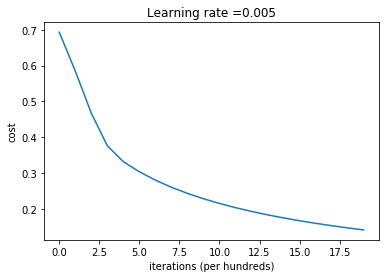

In [96]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

y = 1, you predicted that it is a "cat" picture.


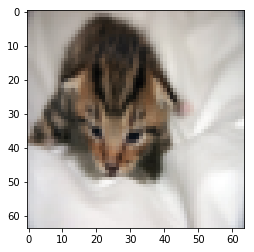

In [25]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

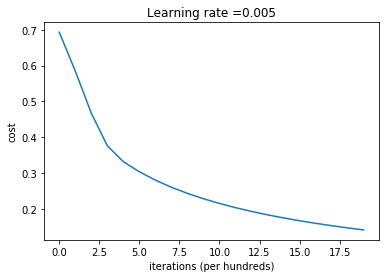

In [26]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

## Further analysis

In [27]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

learning rate is: 0.01
[0.97125943 0.9155338  0.92079132 0.96358044 0.78924234 0.60411297
 0.01179527 0.89814048 0.91522859 0.70264065 0.19380387 0.49537355
 0.7927164  0.85423431 0.00298587 0.96199699 0.01234735 0.9107653
 0.13661137 0.01424336 0.96894735 0.1033746  0.00579297 0.86081326
 0.53811196 0.64950178 0.83272843 0.00426307 0.0131452  0.99947804
 0.11468372 0.82182442 0.69611733 0.4991522  0.67231401 0.01728165
 0.04136099 0.80069693 0.26832359 0.03958566 0.74731239 0.32116434
 0.71871197 0.01205725 0.96879962 0.62310364 0.17737126 0.98960523
 0.74697265 0.07284605]
[1.47839653e-01 5.78008189e-02 9.42385025e-01 4.14849242e-05
 2.27209941e-02 7.29254668e-02 2.23704495e-02 9.49717864e-01
 5.41724297e-02 2.92729896e-02 6.82412299e-02 8.33370210e-01
 1.71420615e-01 9.66879883e-01 8.11537151e-01 2.44343486e-02
 7.87634096e-03 2.64027273e-02 5.60720048e-02 9.53130353e-01
 5.30865327e-03 3.11020747e-02 1.43606493e-01 1.92650472e-02
 9.30132798e-01 8.95291211e-01 2.72790551e-02 9.0148

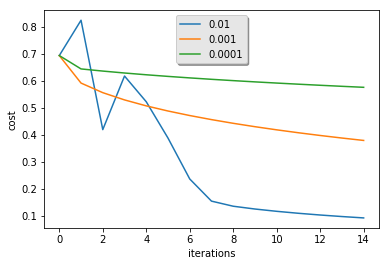

In [28]:
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

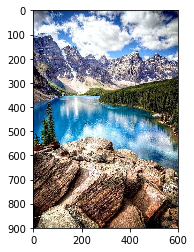

In [46]:
import cv2
my_i = plt.imread("Banff.jpg")
plt.imshow(my_i)


In [41]:
my_image.shape


(900, 600, 3)